In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from src.preprocess import Preprocessor

# Analyze raw data

In [75]:
my_preprocessor = Preprocessor()
pass_lengths, ques_lengths = my_preprocessor.analyze("./data/data_raw/train-v1.1.json")

Analyzing ./data/data_raw/train-v1.1.json: 100%|██████████| 442/442 [00:35<00:00, 12.56it/s]

Statistics of ./data/data_raw/train-v1.1.json
How many (passage, question, answer) tuples : 87599 
pass_max_length: 766 
pass_ave_length: 137
ques_max_length: 60 
ques_ave_length :11 



Text(0.5,1,u'Distribution of passage length')

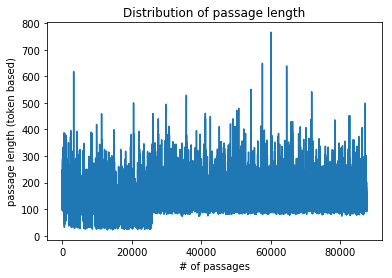

In [150]:
plt.plot(pass_lengths)
plt.xlabel('# of passages')
plt.ylabel('passage length (token based)')
plt.title('Distribution of passage length')

Text(0.5,1,u'Distribution of question length')

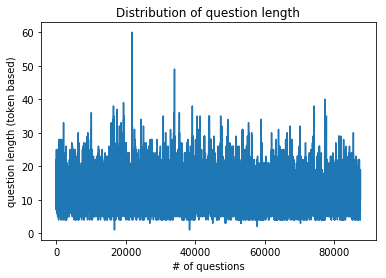

In [151]:
plt.plot(ques_lengths)
plt.xlabel('# of questions')
plt.ylabel('question length (token based)')
plt.title('Distribution of question length')

# Training: function to visualize train-stat

In [26]:

def get_data(stat1_file):
    with open(stat1_file) as f:
        stat1 = json.load(f)
    print stat1["config"]
    batch_loss = [float (batch["batch_loss"]) for batch in stat1["train_stat"]]

    train_loss = [float (batch["train_loss"]) for batch in stat1["train_stat"]]
    train_em = [float (batch["train_em"]) for batch in stat1["train_stat"]]
    train_f1 = [float (batch["train_f1"]) for batch in stat1["train_stat"]]
    valid_loss = [float (batch["valid_loss"]) for batch in stat1["train_stat"]]
    valid_em = [float (batch["valid_em"]) for batch in stat1["train_stat"]]
    valid_f1 = [float (batch["valid_f1"]) for batch in stat1["train_stat"]]
    
    return batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1
def paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1):
    plt.figure(figsize=(10,10))
    
    plt.subplot(211)
#     plt.plot(batch_loss, label='batch loss')
    plt.plot(train_loss, label = "sample train loss")
    plt.plot(valid_loss, label = "sample valid loss")
#     plt.title(stat1["config"]["arch"])
    plt.legend()
    
    
    plt.subplot(212)
    plt.plot(train_em, label = "sample train em")
    plt.plot(train_f1, label = "sample train f1")
    plt.plot(valid_em, label = "sample valid em")
    plt.plot(valid_f1, label = "sample valid f1")
    plt.xlabel('# of 100 mini batches')
#     plt.title(stat1["config"]["arch"])
    plt.legend()
def draw_join(stat_files):
    result = [[], [], [], [], [], [], []]
    for stat_file in stat_files:
        temp = get_data(stat_file)
        for i in xrange(len(result)):
            result[i] += temp[i]
    batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1 =result
    paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1)
def draw(stat1_file, percent = 1.0):
    
    result = [[], [], [], [], [], [], []]
    temp = get_data(stat1_file)
    for i in xrange(len(result)):
        result[i] += temp[i][0: int(len(temp[i]) * percent)]
    batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1 =result
    paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1)
    



# Train match architecture

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}
{u'n_epoch': 5, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}
{u'n_epoch': 4, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


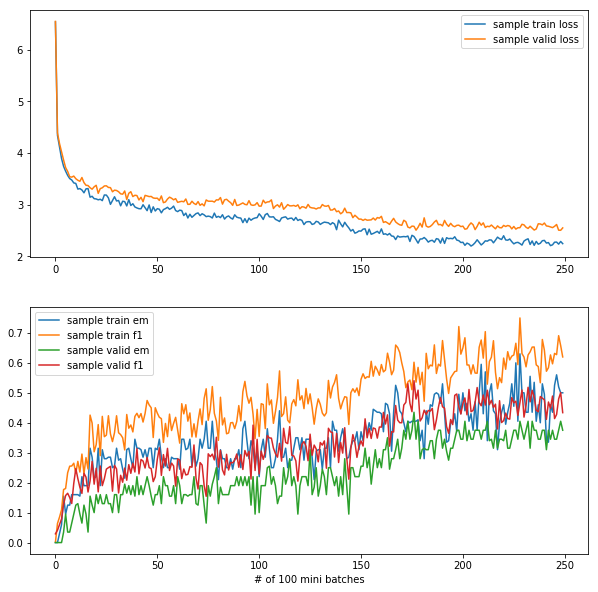

In [27]:
draw_join(["./output/job76/Stat-March-29-2018-08-40-02", "./output/job77/Stat-March-30-2018-01-26-54", "./output/job78/Stat-March-31-2018-02-16-09"])

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 10, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_simple'}


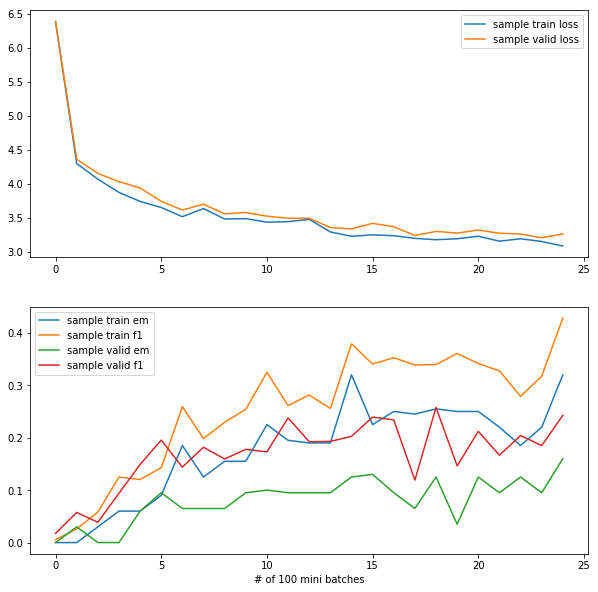

In [28]:
#lr = 0.002
draw("./output/job59/Stat-March-10-2018-04-54-14")
#NOTE: due to bug of code, this indeed is match 

# Train match_change1 architecture: remove h_r from match layer

{u'n_epoch': 10, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}
{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}
{u'n_epoch': 3, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


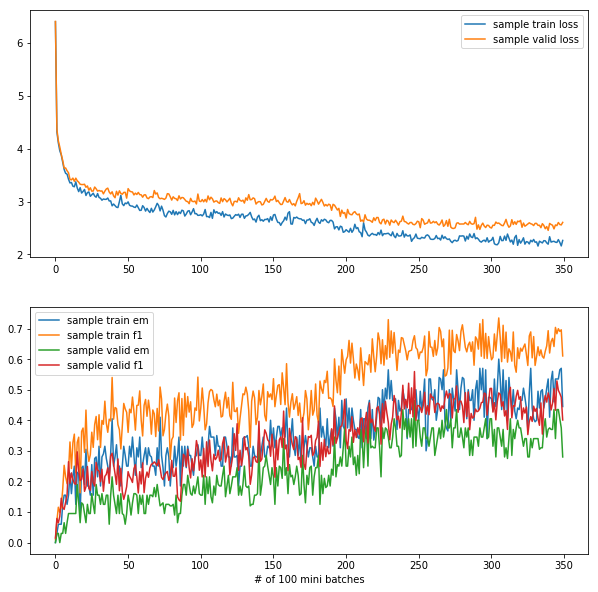

In [29]:
#attemping to get turnning point of validation loss on match. However, validation loss does not go up... Where is the turnning point!
#train match, lr = 0.002
draw_join(["./output/job63/Stat-March-13-2018-08-18-21", "./output/job67/Stat-March-16-2018-04-41-33", "./output/job71/Stat-March-22-2018-11-55-08"])
#NOTE: due to bug of code, this indeed is match_change1

{u'n_epoch': 10, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


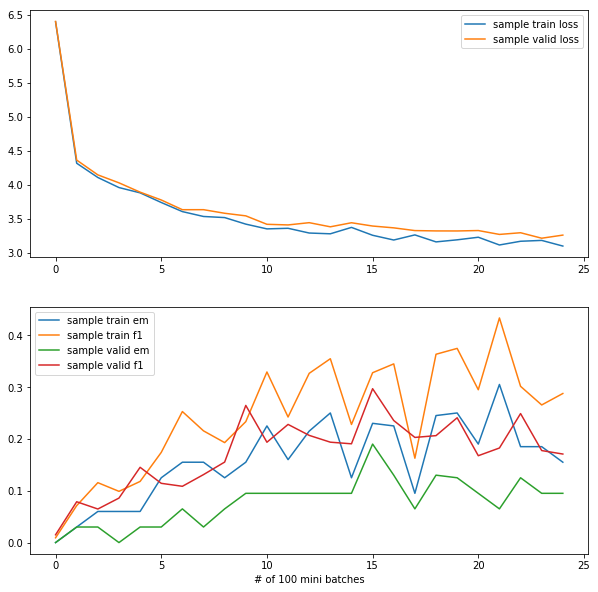

In [30]:
#lr = 0.002
draw("./output/job63/Stat-March-13-2018-08-18-21", 0.1)
#NOTE: due to bug of code, this indeed is match_change1

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.004, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


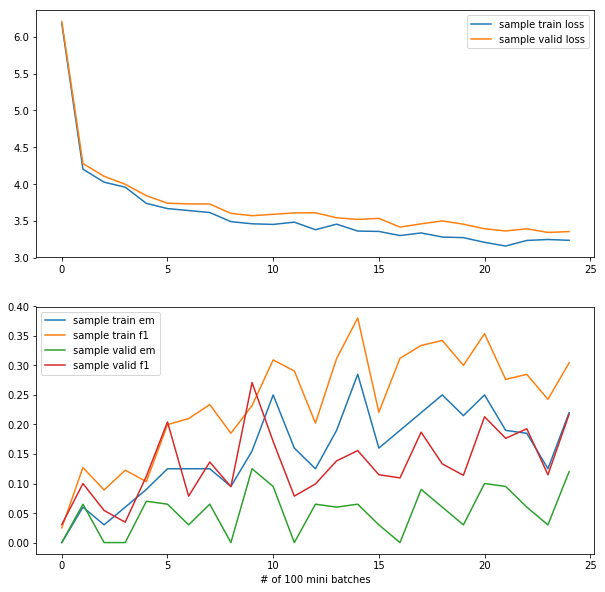

In [31]:
#lr = 0.004
draw("./output/job64/Stat-March-16-2018-01-30-17")
#NOTE: due to bug of code, this indeed is match_change1

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.01, u'num_units': 150, u'ques_max_length': 30, u'arch': u'match'}


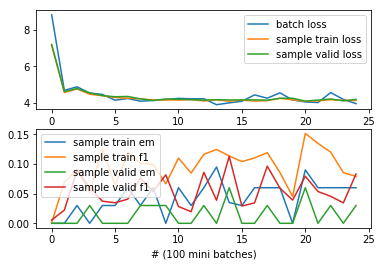

In [10]:
#lr = 0.01
draw("./output/job62/Stat-March-13-2018-02-08-31")
#NOTE: due to bug of code, this indeed is match_change1

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.02, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


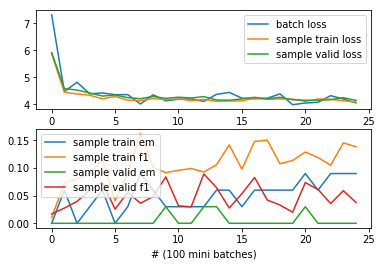

In [11]:
#lr = 0.02
draw("./output/job61/Stat-March-12-2018-08-40-07")
#NOTE: due to bug of code, this indeed is match_change1

# Train match_change2 architecture: remove preprocessing layer

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_change2'}
{u'n_epoch': 9, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_change2'}


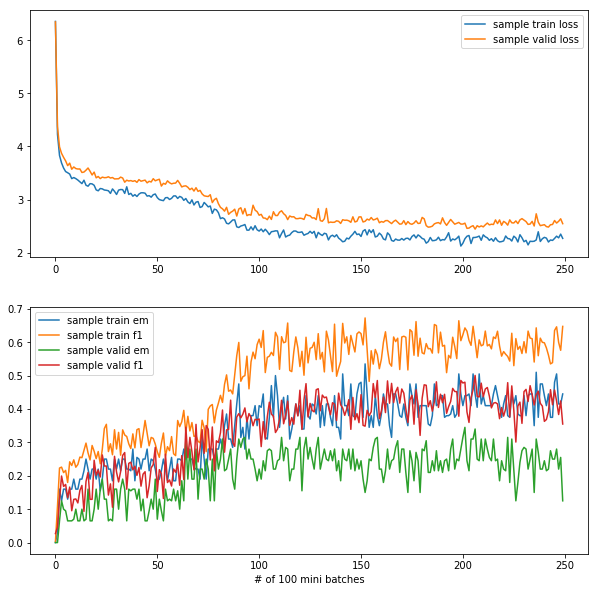

In [32]:
#lr=0.002
draw_join(["./output/job80/Stat-April-05-2018-02-16-21", "./output/job81/Stat-April-05-2018-05-02-49"])

# match_change3 architecture:  combine match_change1 and match_change2

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_change2'}


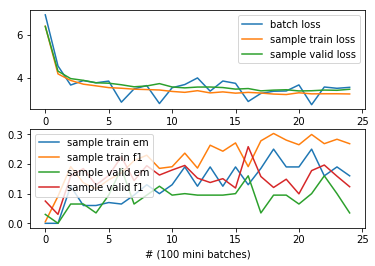

In [16]:
#lr = 0.002
draw("./output/job72/Stat-March-27-2018-11-35-50")
#NOTE: due to bug of code, this indeed is match_change3

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_change2'}
{u'n_epoch': 10, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_change2'}


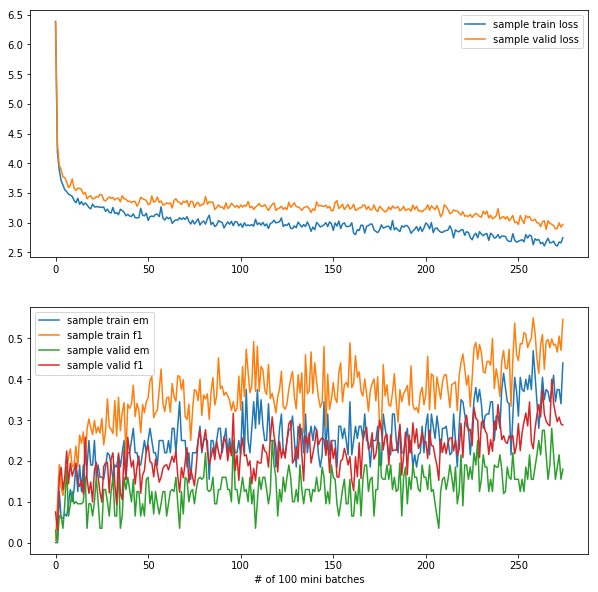

In [33]:
draw_join(["./output/job72/Stat-March-27-2018-11-35-50", "./output/job75/Stat-March-29-2018-01-45-17"])
#NOTE: due to bug of code, this indeed is match_change3

# Train r_net architecture

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 10, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'r_net'}


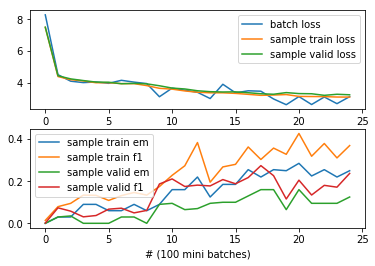

In [15]:
#lr = 0.002

draw("./output/job58/Stat-March-09-2018-11-13-35")

# Testing